## Macro Analysis for ECL

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import datetime as dt


path = "/Users/andreasnilsson/Library/CloudStorage/OneDrive-Nstart/Skrivbordet/Repository Homes/Behavior_Scorecard-DATA-223/1. Data"
os.chdir(path)



In [2]:
df = pd.read_excel('MacroData 2024.xlsx',sheet_name='Data') 

# Shift dates to the last day of the month
df['Date'] = df['Date'] + pd.offsets.MonthEnd()

In [3]:
df = df[  (df.Date  >= '2019-01-01' ) & (df.Date  <= '2024-11-01' ) ]


df['Date'] = pd.to_datetime(df['Date'])
df['90 + '] = df['90 + ']*100
# Calculate 3-month rolling mean
df['90 + Mean'] = df['90 + '].rolling(window=6).mean()
df['GWO'] = df['GWO']*100



# Ensure numeric types for operations, filling NaN values where necessary
df['Inflation (%)'] = pd.to_numeric(df['Inflation (%)'], errors='coerce') 
df['Riksbankens Prognos'] = pd.to_numeric(df['Riksbankens Prognos'], errors='coerce')

# Using np.where to create 'Inflation (%) All'
df['Inflation (%) All'] = np.where(
    df['Inflation (%)'] > -11, 
    df['Inflation (%)'] +1,  # Use this value if condition is true
    df['Riksbankens Prognos']+1  # Use this value if condition is false
)


df['Inflation (%) Mean All'] = df['Inflation (%) All'].rolling(window=6).mean()



df.set_index('Date',inplace=True)



In [4]:
df

,Inflation (%),Household consumption expenditure,"Unemployment per month, 15-74 years",Repo rate,90 +,Riksbankens Prognos,GWO,Unnamed: 8,Unnamed: 9,90 + Mean,Inflation (%) All,Inflation (%) Mean All
Date,,,,,,,,,,,,
2019-01-31,2.0,1.22,6.77,-0.25,2.941176,NaN,1.363657,NaN,NaN,NaN,3.00,NaN
2019-02-28,1.9,0.39,6.80,-0.25,2.409639,NaN,1.148486,NaN,NaN,NaN,2.90,NaN
2019-03-31,1.8,0.19,6.84,-0.25,4.395604,NaN,0.791817,NaN,NaN,NaN,2.80,NaN
2019-04-30,2.0,0.09,6.87,-0.25,5.076142,NaN,0.722646,NaN,NaN,NaN,3.00,NaN
2019-05-31,2.1,-0.64,6.91,-0.25,1.149425,NaN,0.894458,NaN,NaN,NaN,3.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,NaN,NaN,NaN,NaN,NaN,1.96,2.950670,NaN,NaN,NaN,2.96,3.671667
2024-07-31,NaN,NaN,NaN,NaN,NaN,2.21,2.911749,NaN,NaN,NaN,3.21,3.490000
2024-08-31,NaN,NaN,NaN,NaN,NaN,1.98,2.884374,NaN,NaN,NaN,2.98,3.333333


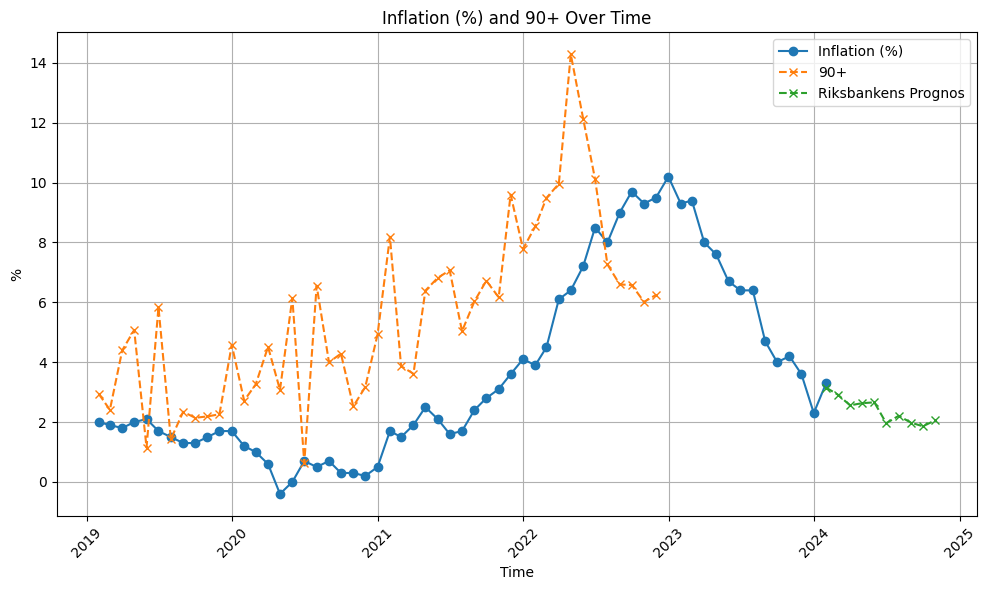

In [5]:

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df.index, df['Inflation (%)'], label='Inflation (%)', marker='o', linestyle='-')  # Time series for Inflation
plt.plot(df.index, df['90 + '], label='90+', marker='x', linestyle='--')  # Time series for '90+'
plt.plot(df.index, df['Riksbankens Prognos'], label='Riksbankens Prognos', marker='x', linestyle='--')  # Time series for '90+'
plt.title('Inflation (%) and 90+ Over Time')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('%')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off anything
plt.show()  # Display the plot



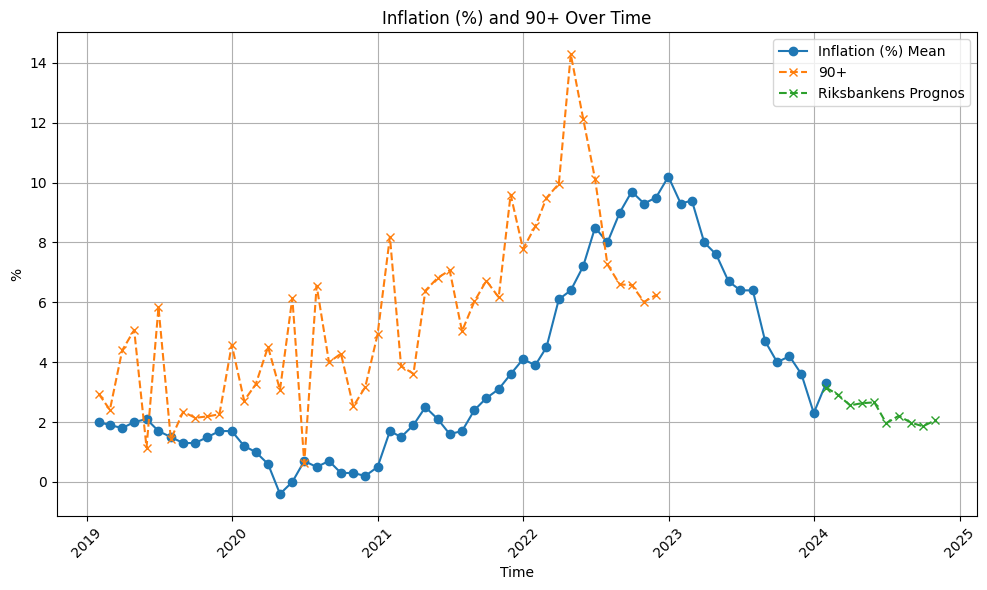

In [6]:

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df.index, df['Inflation (%)'], label='Inflation (%) Mean', marker='o', linestyle='-')  # Time series for Inflation
plt.plot(df.index, df['90 + '], label='90+', marker='x', linestyle='--')  # Time series for '90+'
plt.plot(df.index, df['Riksbankens Prognos'], label='Riksbankens Prognos', marker='x', linestyle='--')  # Time series for '90+'
plt.title('Inflation (%) and 90+ Over Time')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('%')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off anything
plt.show()  # Display the plot

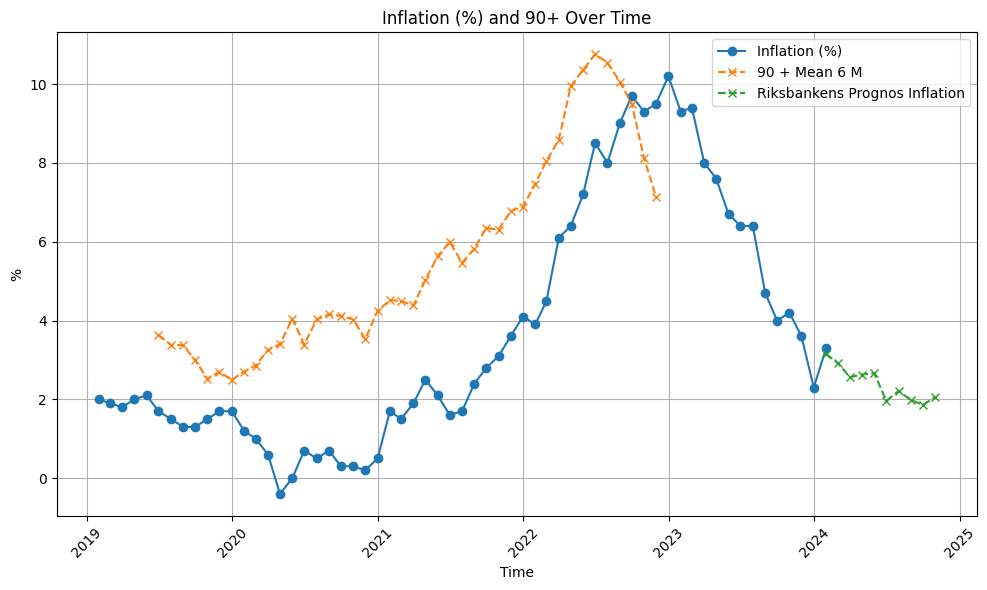

In [7]:

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df.index, df['Inflation (%)'], label='Inflation (%)', marker='o', linestyle='-')  # Time series for Inflation
plt.plot(df.index, df['90 + Mean'], label='90 + Mean 6 M', marker='x', linestyle='--')  # Time series for '90+'
plt.plot(df.index, df['Riksbankens Prognos'], label='Riksbankens Prognos Inflation', marker='x', linestyle='--')  # Time series for '90+'
plt.title('Inflation (%) and 90+ Over Time')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('%')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off anything
plt.show()  # Display the plot

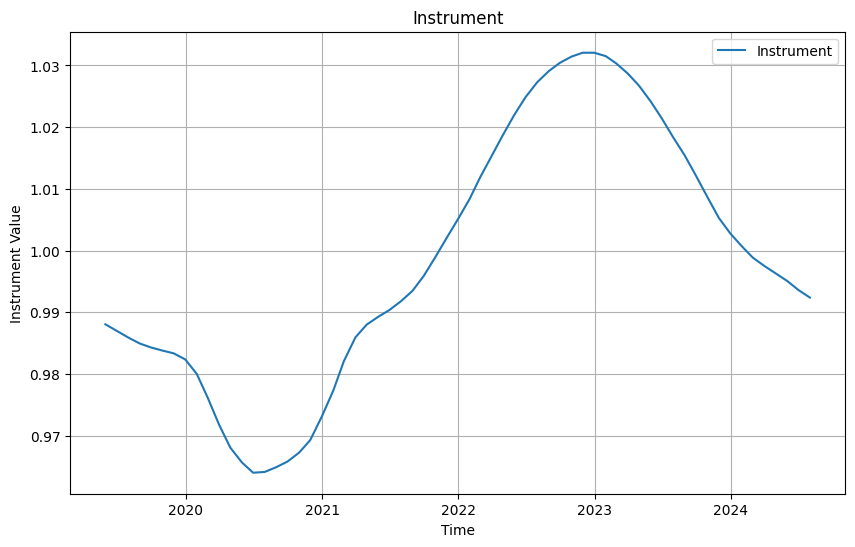

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Create a lagged version of 'Inflation (%) Mean All' by 6 steps
df['Inflation (%) Mean All Lagged'] = df['Inflation (%) Mean All'].shift(-3)

# Use the lagged version for calculations
df['Instrument'] = df['Inflation (%) Mean All Lagged']**(1/3)  # Adjusted to use the lagged column


# Calculate the mean of the 'Instrument' column
instrument_mean = df['Instrument'].mean()

# Divide the 'Instrument' column by its mean to normalize it
df['Instrument Normalized'] = df['Instrument'] / instrument_mean

# Calculate rolling mean with a window of 3 on the 'Instrument' column
df['Instrument Rolling Mean'] = df['Instrument Normalized'].rolling(window=3).mean()

df['Instrument Rolling Mean'] = df['Instrument Rolling Mean']**(1/10)

# Plot the rolling mean of 'Instrument'
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(df['Instrument Rolling Mean'], label='Instrument')  # Plot 'Instrument Rolling Mean'
plt.title('Instrument')  # Set the plot title
plt.xlabel('Time')  # Set the x-axis label (adjust if you have a specific time column)
plt.ylabel('Instrument Value')  # Set the y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot


In [28]:
df.to_excel('Macro_Instrument.xlsx', index=True)

In [29]:
df.head(30)

,Inflation (%),Household consumption expenditure,"Unemployment per month, 15-74 years",Repo rate,90 +,Riksbankens Prognos,GWO,Unnamed: 8,Unnamed: 9,90 + Mean,Inflation (%) All,Inflation (%) Mean All,Inflation (%) Mean All Lagged,Instrument,Instrument Normalized,Instrument Rolling Mean
Date,,,,,,,,,,,,,,,,
2019-01-31,2.0,1.22,6.77,-0.250000,2.941176,NaN,1.363657,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2019-02-28,1.9,0.39,6.80,-0.250000,2.409639,NaN,1.148486,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN
2019-03-31,1.8,0.19,6.84,-0.250000,4.395604,NaN,0.791817,NaN,NaN,NaN,2.8,NaN,2.916667,1.428770,0.896076,NaN
2019-04-30,2.0,0.09,6.87,-0.250000,5.076142,NaN,0.722646,NaN,NaN,NaN,3.0,NaN,2.833333,1.415031,0.887460,NaN
2019-05-31,2.1,-0.64,6.91,-0.250000,1.149425,NaN,0.894458,NaN,NaN,NaN,3.1,NaN,2.733333,1.398184,0.876894,0.988059
2019-06-30,1.7,0.00,6.96,-0.250000,5.833333,NaN,0.788322,NaN,NaN,3.634220,2.7,2.916667,2.650000,1.383828,0.867890,0.987008
2019-07-31,1.5,2.37,7.01,-0.250000,1.428571,NaN,1.501736,NaN,NaN,3.382119,2.5,2.833333,2.566667,1.369167,0.858696,0.985924
2019-08-31,1.3,2.35,7.06,-0.250000,2.343750,NaN,1.539497,NaN,NaN,3.371138,2.3,2.733333,2.500000,1.357209,0.851196,0.984946
2019-09-30,1.3,2.96,7.12,-0.250000,2.142857,NaN,1.981591,NaN,NaN,2.995680,2.3,2.650000,2.500000,1.357209,0.851196,0.984306


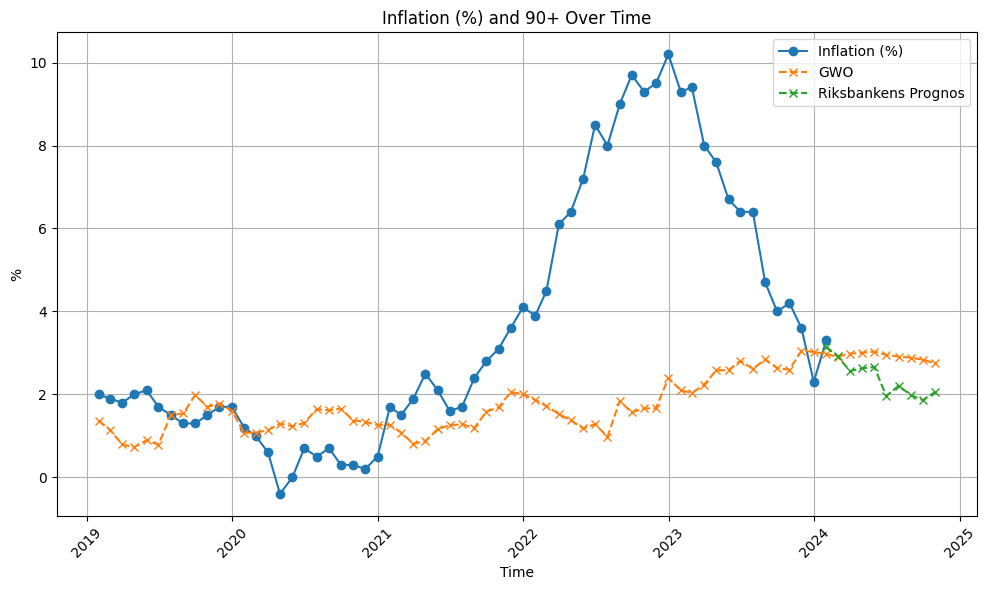

In [30]:

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df.index, df['Inflation (%)'], label='Inflation (%)', marker='o', linestyle='-')  # Time series for Inflation
plt.plot(df.index, df['GWO'], label='GWO', marker='x', linestyle='--')  # Time series for '90+'
plt.plot(df.index, df['Riksbankens Prognos'], label='Riksbankens Prognos', marker='x', linestyle='--')  # Time series for '90+'
plt.title('Inflation (%) and 90+ Over Time')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('%')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off anything
plt.show()  # Display the plot

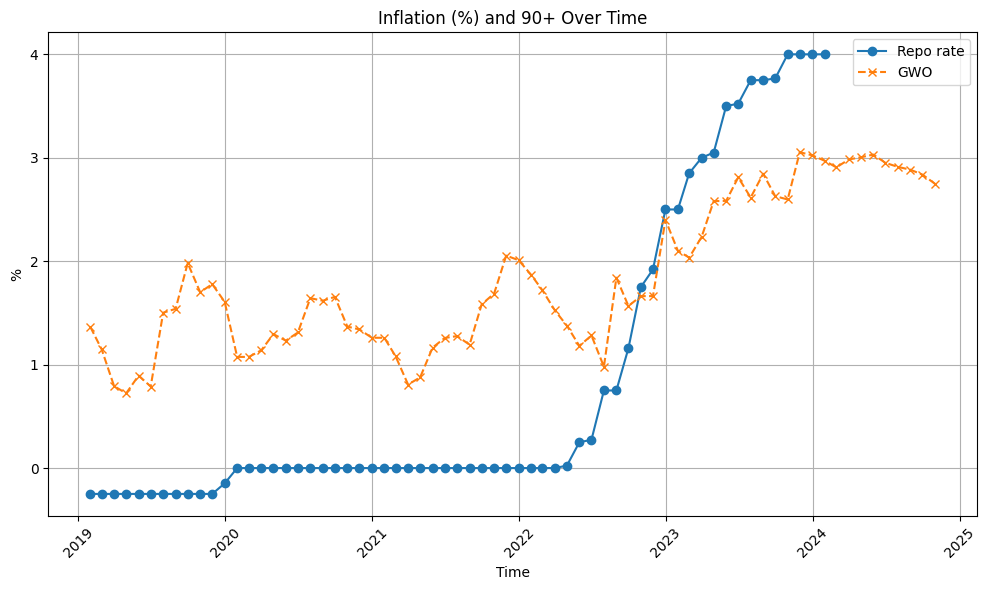

In [31]:

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df.index, df['Repo rate'], label='Repo rate', marker='o', linestyle='-')  # Time series for Inflation
plt.plot(df.index, df['GWO'], label='GWO', marker='x', linestyle='--')  # Time series for '90+'
plt.title('Inflation (%) and 90+ Over Time')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('%')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to not cut off anything
plt.show()  # Display the plot

In [32]:

# Calculate correlation between 'feature1' and 'feature2'
print(df['Inflation (%)'].corr(df['GWO']))
print(df['Household consumption expenditure'].corr(df['GWO']))
print(df['Unemployment per month, 15-74 years'].corr(df['GWO']))
print(df['Repo rate'].corr(df['GWO']))

0.3823205606191898
-0.07814236030530396
-0.11271050995628344
0.857486056348752


0.8819260998069184
0.40511970765756905
-0.20628244645466068
0.536387772079468


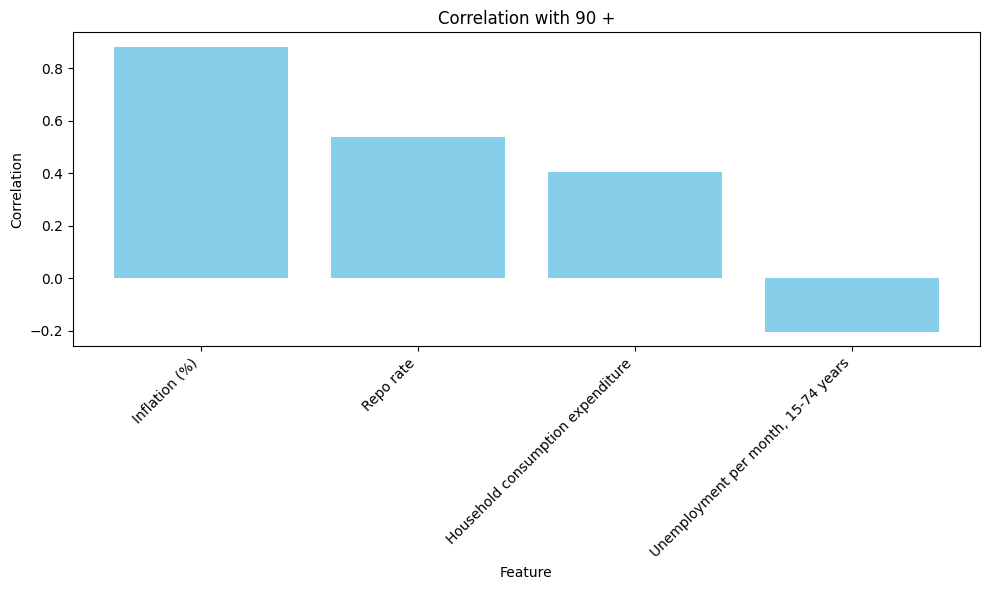

In [360]:
df = df[  (df.index  >= '2019-01-01' ) & (df.index  <= '2022-11-01' ) ]

variabel = '90 + Mean'


# Calculate correlation between 'feature1' and 'feature2'
print(df['Inflation (%)'].corr(df[variabel]))
print(df['Household consumption expenditure'].corr(df[variabel]))
print(df['Unemployment per month, 15-74 years'].corr(df[variabel]))
print(df['Repo rate'].corr(df[variabel]))


import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it already contains the necessary columns

# Calculate correlations
correlations = {
    'Inflation (%)': df['Inflation (%)'].corr(df[variabel]),
    'Household consumption expenditure': df['Household consumption expenditure'].corr(df[variabel]),
    'Unemployment per month, 15-74 years': df['Unemployment per month, 15-74 years'].corr(df[variabel]),
    'Repo rate': df['Repo rate'].corr(df[variabel]),
}

# Convert to DataFrame for easy sorting
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Sort by the 'Correlation' values
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(corr_df['Feature'], corr_df['Correlation'], color='skyblue')  # Create bar plot
plt.title('Correlation with 90 +')  # Set title
plt.xlabel('Feature')  # Set x-axis label
plt.ylabel('Correlation')  # Set y-axis label
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display plot


In [361]:
df.columns

Index(['Inflation (%)', 'Household consumption expenditure',
       'Unemployment per month, 15-74 years', 'Repo rate', '90 + ',
       'Riksbankens Prognos', 'GWO', 'Unnamed: 8', 'Unnamed: 9', '90 + Mean',
       'Inflation (%) All', 'Inflation (%) Mean All',
       'Inflation (%) Mean All Lagged', 'Instrument', 'Instrument Normalized',
       'Instrument Rolling Mean'],
      dtype='object')